# DOP Calculator for Option Strategies

***2019DMB02 - Akash Gupta***

# Basics of option payoffs

Before starting out, here are some common notations used in Options pricing:

1. Strike Price: $K$

2. Price of Asset at Maturity: S_T

3. Price of the **call option** is: c

4. The price of the **put option** is: p

Note that we will mention all **payoffs** by including the option price. With this, here are the payoffs for various types of Options and across different positions.

1. **Long call payoff**: $\max(S_T - K - c, -c)$

2. **Short call payoff**: $-\max(S_T - K - c, -c)$

3. **Long put payoff**: $\max(K - S_T - p, -p)$

4. **Short put payoff**: $-\max(K - S_T - p, -p)$

# About combined payoffs

In this report we will present the combined payoffs resulting from holding a portfolio which could be a combination of long/short positions in stock and long/short positions in multiple types of options. The idea is to plot the payoffs from the constituents of the portfolio and then plot the combined payoffs as well. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
def long_call(c, ST, K):
    payoff_LC = []
    for i in ST:
        if i <= K:
            payoff_LC.append(-c)
        else:
            payoff_LC.append(i - K - c)
    return np.array(payoff_LC)

def long_put(p, ST, K):
    payoff_LP = []
    for i in ST:
        if i < K:
            payoff_LP.append(K - i - p)
        else:
            payoff_LP.append(-p)
    return np.array(payoff_LP)

def short_call(c, ST, K):
    payoff_SC = []
    for i in ST:
        if i <= K:
            payoff_SC.append(c)
        else:
            payoff_SC.append(-(i - K - c))
    return np.array(payoff_SC)
        
def short_put(p, ST, K):
    payoff_SP = []
    for i in ST:
        if i < K:
            payoff_SP.append(-(K - i - p))
        else:
            payoff_SP.append(p)
    return np.array(payoff_SP)
            
def short_stock(price, ST):
    short_S = []
    for i in ST:
        short_S.append(-(-price + i))
    return np.array(short_S)
        
def long_stock(price, ST):
    long_S = []
    for i in ST:
        long_S.append(-price + i)
    return np.array(long_S)

def combined_payoff(ST_1, args):
    color = cm.rainbow(np.linspace(0, 1, len(args)))
    total_payoff = np.zeros(len(ST_1))
    fig = plt.figure(figsize = (7, 7))
    for i, c in zip(range(len(args)), color):
        total_payoff += args[i]()
        plt.plot(ST_1, args[i](), c=c, linestyle='--')
    plt.plot(ST_1, total_payoff, 'r')
    
def extract_function_args(ST_1, port):
    func_args = {}
    color = cm.rainbow(np.linspace(0, 1, len(port)))
    total_pay = np.zeros(len(ST_1))
    fig = plt.figure(figsize = (7, 7))
    for key, value in port.items():
        if len(port[key]) == 0:
            pass
        elif len(port[key]) != 0:
            func_args[key] = value
    return func_args

def plot_funcs(ST_1, port):
    func_args = extract_function_args(ST_1, port)
    total_payoff = np.zeros(len(ST_1))
    for key, value in func_args.items():
        if key == 'sell call':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, short_call(value[i], ST_1,
                                        func_args['strike_SC'][i]), c=c, linestyle='--')
                total_payoff += short_call(value[i], ST_1, func_args['strike_SC'][i])
        elif key == 'buy call':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, long_call(value[i], ST_1,
                                          func_args['strike_LC'][i]), c=c, linestyle='--') 
                total_payoff += long_call(value[i], ST_1, func_args['strike_LC'][i])
        elif key == 'sell put':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, short_put(value[i], ST_1,
                                          func_args['strike_SP'][i]), c=c, linestyle='--') 
                total_payoff += short_put(value[i], ST_1, func_args['strike_SP'][i])
        elif key == 'buy put':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, long_put(value[i], ST_1,
                                          func_args['strike_LP'][i]), c=c, linestyle='--') 
                total_payoff += long_put(value[i], ST_1, func_args['strike_LP'][i])
        elif key == 'buy share':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, long_stock(value[i], ST_1),
                                          c=c, linestyle='--') 
                total_payoff += long_stock(value[i], ST_1)
        elif key == 'sell share':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, short_stock(value[i], ST_1),
                                          c=c, linestyle='--')
                total_payoff += short_stock(value[i], ST_1)    
    plt.plot(ST_1, total_payoff, 'g', linewidth=4)            
    m = np.max(total_payoff)
    print("****************")
    print()
    print("Max payoff is: ", m)
    print()
    print("****************")
    print()
    print("Stock price at which max payoff is achieved: ", 
          ST_1[np.where(total_payoff == m)])
    print()
    print("****************")

In [20]:
def display_menu():
    print("****************")
    print()
    print("Here are your options for creating a portfolio:")
    print("1. Buy a share (long stock position) -- type 'buy share'")
    print("2. Sell a share (short stock position) -- type 'sell share'")
    print("3. Buy a call option (long call position) -- type 'buy call'")
    print("4. Sell a call option (short call position) -- type 'sell call'")
    print("5. Buy a put option (long put position) -- type 'buy put'")
    print("6. Sell a put option (short put position) -- type 'sell put'")
    print()
    print("****************")
    print()

def create_folio():   
    ST_1 = np.sort(np.array(np.random.normal(0, 100, 1000)))
    folio_dict = {'buy share': [], 'sell share': [], 'buy call': [], 'sell call': [],
                  'buy put': [], 'sell put': [], 'strike_LC': [], 'strike_SC': [],
                  'strike_LP': [], 'strike_SP': []}
    args_main = {}
    bool1 = True
    counter = 0
    while bool1 == True:
        display_menu()
        print()
        a = input("What would you like ? (type 'nothing' to exit || type the action words otherise): ")
        if a == 'nothing':
            bool1 = False
            return folio_dict, ST_1, args_main
        elif a == 'buy share':
            st = int(input("enter a stock price: "))
            folio_dict['buy share'].append(st)
            args_main[counter] = (lambda: long_stock(st, ST_1))
        elif a == 'sell share':
            st = int(input("enter a stock price: "))
            folio_dict['sell share'].append(st)
            args_main[counter] = (lambda: short_stock(st, ST_1))
        elif a == 'buy call':
            c = int(input("enter a long call price: "))
            folio_dict['buy call'].append(c)
            k = int(input("enter a long call strike price: "))
            folio_dict['strike_LC'].append(k)
            args_main[counter] = (lambda: long_call(folio_dict['buy call'][-1], 
                                                    ST_1, folio_dict['strike_LC'][-1]))
        elif a == 'sell call':
            c = int(input("enter a short call price: "))
            folio_dict['sell call'].append(c)
            k = int(input("enter a short call strike price: "))
            folio_dict['strike_SC'].append(k)
            args_main[counter] = (lambda: short_call(folio_dict['sell call'][-1], 
                                                     ST_1, folio_dict['sell call'][-1]))
        elif a == 'buy put':
            p = int(input("enter a long put price: "))
            folio_dict['buy put'].append(p)
            k = int(input("enter a long put strike price: "))
            folio_dict['strike_LP'].append(k)
            args_main[counter] = (lambda: long_put(p, ST_1, k))
        elif a == 'sell put':
            p = int(input("enter a short put price: "))
            folio_dict['sell put'].append(p)
            k = int(input("enter a short put strike price: "))
            folio_dict['strike_SP'].append(k)
            args_main[counter] = (lambda: short_put(p, ST_1, k))
        counter += 1

In [21]:
port, stockprice, args_new = create_folio()

****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  buy call
enter a long call price:  30
enter a long call strike price:  40


****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  buy call
enter a long call price:  10
enter a long call strike price:  100


****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  sell call
enter a short call price:  20
enter a short call strike price:  70


****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  sell call
enter a short call price:  20
enter a short call strike price:  70


****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  nothing


****************

Max payoff is:  29.376304935880498

****************

Stock price at which max payoff is achieved:  [70.62369506]

****************


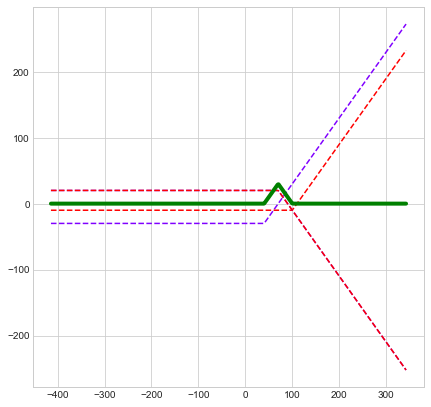

In [22]:
plot_funcs(stockprice, port)